<a href="https://colab.research.google.com/github/nikkibinoy/practice/blob/main/Casestudy_on_preproceesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler,LabelEncoder,OrdinalEncoder

In [28]:
df=pd.read_csv('/content/House_Pricing.csv')
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [29]:
df.shape

(21613, 21)

In [30]:
df.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [32]:
data1=df[['Area of the House from Basement (in Sqft)','Lot Area (in Sqft)','Flat Area (in Sqft)','Basement Area (in Sqft)','Condition of the House']]
data1

,Area of the House from Basement (in Sqft),Lot Area (in Sqft),Flat Area (in Sqft),Basement Area (in Sqft),Condition of the House
0,1180.0,5650.0,1180.0,0,Fair
1,2170.0,7242.0,2570.0,400,Fair
2,770.0,10000.0,770.0,0,Fair
3,1050.0,5000.0,1960.0,910,Excellent
4,1680.0,8080.0,1680.0,0,Fair
...,...,...,...,...,...
21608,1530.0,1131.0,1530.0,0,Fair
21609,2310.0,5813.0,2310.0,0,Fair
21610,1020.0,1350.0,1020.0,0,Fair
21611,1600.0,2388.0,1600.0,0,Fair


In [33]:
df.drop(['Area of the House from Basement (in Sqft)'],axis=1,inplace=True)
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,Fair,8,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,Fair,8,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,Fair,7,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,Fair,8,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [34]:
df.isna().sum()

ID                                            0
Date House was Sold                           0
Sale Price                                    4
No of Bedrooms                                0
No of Bathrooms                               4
Flat Area (in Sqft)                           9
Lot Area (in Sqft)                            9
No of Floors                                  0
Waterfront View                               0
No of Times Visited                       19489
Condition of the House                        0
Overall Grade                                 0
Basement Area (in Sqft)                       0
Age of House (in Years)                       0
Renovated Year                                0
Zipcode                                       1
Latitude                                      1
Longitude                                     1
Living Area after Renovation (in Sqft)        1
Lot Area after Renovation (in Sqft)           0
dtype: int64

In [35]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [63]:
df['Sale Price'].fillna(df['Sale Price'].median(),inplace=True)
df['No of Bathrooms'].fillna(df['No of Bathrooms'].median(),inplace=True)

df.head()



,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Twice,Fair,7,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Twice,Fair,7,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Twice,Fair,6,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Twice,Excellent,7,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Twice,Fair,8,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [62]:
df['Flat Area (in Sqft)'].fillna(df['Flat Area (in Sqft)'].median(),inplace=True)
df['Lot Area (in Sqft)'].fillna(df['Lot Area (in Sqft)'].median(),inplace=True)
df['Living Area after Renovation (in Sqft)'].fillna(df['Living Area after Renovation (in Sqft)'].median(),inplace=True)
df['Latitude'].fillna(df['Latitude'].median(),inplace=True)
df['Longitude'].fillna(df['Longitude'].median(),inplace=True)
df['Zipcode'].fillna(df['Zipcode'].median(),inplace=True)

In [64]:
df.isna().sum()

ID                                        0
Date House was Sold                       0
Sale Price                                0
No of Bedrooms                            0
No of Bathrooms                           0
Flat Area (in Sqft)                       0
Lot Area (in Sqft)                        0
No of Floors                              0
Waterfront View                           0
No of Times Visited                       0
Condition of the House                    0
Overall Grade                             0
Basement Area (in Sqft)                   0
Age of House (in Years)                   0
Renovated Year                            0
Zipcode                                   0
Latitude                                  0
Longitude                                 0
Living Area after Renovation (in Sqft)    0
Lot Area after Renovation (in Sqft)       0
dtype: int64

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='No of Times Visited', ylabel='Count'>

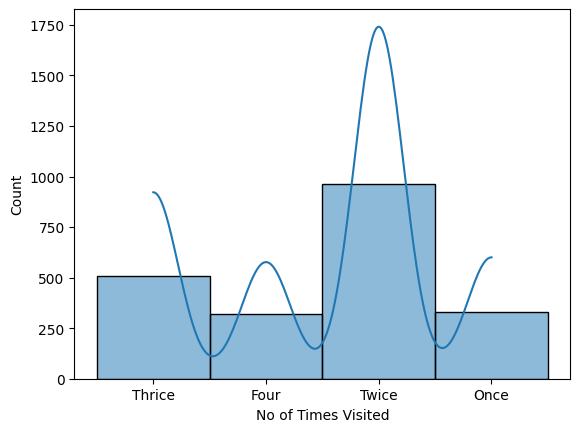

In [45]:
sns.histplot(df['No of Times Visited'],kde=True)

In [49]:
df['No of Times Visited'].fillna(df['No of Times Visited'].mode()[0],inplace=True)

In [50]:
df.isna().sum()

ID                                        0
Date House was Sold                       0
Sale Price                                0
No of Bedrooms                            0
No of Bathrooms                           0
Flat Area (in Sqft)                       0
Lot Area (in Sqft)                        0
No of Floors                              0
Waterfront View                           0
No of Times Visited                       0
Condition of the House                    0
Overall Grade                             0
Basement Area (in Sqft)                   0
Age of House (in Years)                   0
Renovated Year                            0
Zipcode                                   0
Latitude                                  0
Longitude                                 0
Living Area after Renovation (in Sqft)    0
Lot Area after Renovation (in Sqft)       0
dtype: int64

In [52]:
df.nunique()

ID                                        21436
Date House was Sold                          13
Sale Price                                 3626
No of Bedrooms                               13
No of Bathrooms                              31
Flat Area (in Sqft)                        1037
Lot Area (in Sqft)                         9779
No of Floors                                  6
Waterfront View                               2
No of Times Visited                           4
Condition of the House                        5
Overall Grade                                10
Basement Area (in Sqft)                     306
Age of House (in Years)                     116
Renovated Year                               70
Zipcode                                      71
Latitude                                   5035
Longitude                                   753
Living Area after Renovation (in Sqft)      778
Lot Area after Renovation (in Sqft)        8689
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'ID'),
  Text(2, 0, 'Sale Price'),
  Text(3, 0, 'No of Bedrooms'),
  Text(4, 0, 'No of Bathrooms'),
  Text(5, 0, 'Flat Area (in Sqft)'),
  Text(6, 0, 'Lot Area (in Sqft)'),
  Text(7, 0, 'No of Floors'),
  Text(8, 0, 'Overall Grade'),
  Text(9, 0, 'Basement Area (in Sqft)'),
  Text(10, 0, 'Age of House (in Years)'),
  Text(11, 0, 'Renovated Year'),
  Text(12, 0, 'Zipcode'),
  Text(13, 0, 'Latitude'),
  Text(14, 0, 'Longitude'),
  Text(15, 0, 'Living Area after Renovation (in Sqft)'),
  Text(16, 0, 'Lot Area after Renovation (in Sqft)')])

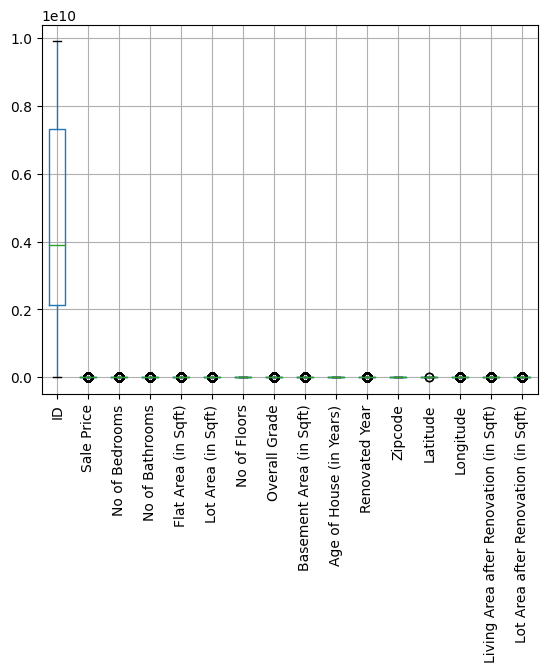

In [69]:
df.boxplot()
plt.xticks(rotation=90)

In [58]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Twice,Fair,7,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Twice,Fair,7,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Twice,Fair,6,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Twice,Excellent,7,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Twice,Fair,8,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      21613 non-null  int64  
 1   Date House was Sold                     21613 non-null  object 
 2   Sale Price                              21613 non-null  float64
 3   No of Bedrooms                          21613 non-null  int64  
 4   No of Bathrooms                         21613 non-null  float64
 5   Flat Area (in Sqft)                     21613 non-null  float64
 6   Lot Area (in Sqft)                      21613 non-null  float64
 7   No of Floors                            21613 non-null  float64
 8   Waterfront View                         21613 non-null  object 
 9   No of Times Visited                     21613 non-null  object 
 10  Condition of the House                  21613 non-null  ob

In [85]:
categorical_columns=['Condition of the House','Date House was Sold','Waterfront View','No of Times Visited']
numerical_columns=['ID','Sale Price','No of Floors','Age of House (in Years)','Renovated Year','Lot Area (in Sqft)','Flat Area (in Sqft)','Basement Area (in Sqft)','Living Area after Renovation (in Sqft)','Latitude','Longitude','Zipcode','Overall Grade','No of Bedrooms','No of Bathrooms']

In [77]:
df_encoded=pd.get_dummies(df,columns=categorical_columns,dtype=int,drop_first=True)
df_encoded

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Basement Area (in Sqft),Age of House (in Years),...,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,0,63,...,0,0,0,0,0,0,0,0,0,1
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,400,67,...,0,0,0,0,0,0,0,0,0,1
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,0,85,...,0,0,1,0,0,0,0,0,0,1
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,910,53,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,0,31,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,0,9,...,0,0,0,0,0,0,0,0,0,1
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,0,4,...,0,0,1,0,0,0,0,0,0,1
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,0,9,...,0,0,0,0,0,0,0,0,0,1
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,0,14,...,0,0,0,1,0,0,0,0,0,1


In [78]:
df_encoded.shape

(21613, 36)

In [67]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      21613 non-null  int64  
 1   Sale Price                              21613 non-null  float64
 2   No of Bedrooms                          21613 non-null  int64  
 3   No of Bathrooms                         21613 non-null  float64
 4   Flat Area (in Sqft)                     21613 non-null  float64
 5   Lot Area (in Sqft)                      21613 non-null  float64
 6   No of Floors                            21613 non-null  float64
 7   Overall Grade                           21613 non-null  int64  
 8   Basement Area (in Sqft)                 21613 non-null  int64  
 9   Age of House (in Years)                 21613 non-null  int64  
 10  Renovated Year                          21613 non-null  in

In [71]:
df_std_scaled=df_encoded.copy()

std_scaler=StandardScaler()
df_std_scaled[numerical_columns]=std_scaler.fit_transform(df_encoded[numerical_columns])
df_std_scaled

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Basement Area (in Sqft),Age of House (in Years),...,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice
0,0.886146,-0.866480,3,1.00,-0.980024,-0.228345,1.0,-0.564013,-0.658681,0.544898,...,0,0,0,0,0,0,0,0,0,1
1,0.637511,-0.005985,3,2.25,0.533683,-0.189908,2.0,-0.564013,0.245141,0.681079,...,0,0,0,0,0,0,0,0,0,1
2,0.365444,-0.980541,2,1.00,-1.426513,-0.123320,1.0,-1.468651,-0.658681,1.293892,...,0,0,1,0,0,0,0,0,0,1
3,-0.727656,0.173682,4,3.00,-0.130605,-0.244039,1.0,-0.564013,1.397515,0.204446,...,0,0,0,0,0,0,0,0,0,1
4,-0.912881,-0.082207,3,2.00,-0.435525,-0.169676,1.0,0.340626,-0.658681,-0.544548,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-1.500888,-0.490541,3,2.50,-0.598875,-0.337451,3.0,0.340626,-0.658681,-1.293542,...,0,0,0,0,0,0,0,0,0,1
21609,0.702159,-0.381652,4,2.50,0.250544,-0.224410,2.0,0.340626,-0.658681,-1.463768,...,0,0,1,0,0,0,0,0,0,1
21610,-1.062751,-0.375932,2,0.75,-1.154264,-0.332163,2.0,-0.564013,-0.658681,-1.293542,...,0,0,0,0,0,0,0,0,0,1
21611,-1.491046,-0.381652,3,2.50,-0.522645,-0.307102,2.0,0.340626,-0.658681,-1.123316,...,0,0,0,1,0,0,0,0,0,1


In [84]:
df_std_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Basement Area (in Sqft),Age of House (in Years),...,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04,2.161300e+04,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,1.144075e-16,-4.734102e-17,3.370842,2.114732,-1.183526e-16,6.312136e-17,1.494309,2.367051e-16,6.838148e-17,0.000000,...,0.082080,0.103225,0.057836,0.045251,0.086753,0.029889,0.007542,0.015361,0.023597,0.946282
std,1.000023e+00,1.000023e+00,0.930062,0.770067,1.000023e+00,1.000023e+00,0.539989,1.000023e+00,1.000023e+00,1.000023,...,0.274493,0.304259,0.233438,0.207858,0.281480,0.170286,0.086517,0.122987,0.151793,0.225465
min,-1.591970e+00,-1.266375e+00,0.000000,0.000000,-1.949233e+00,-3.522024e-01,1.000000,-5.991845e+00,-6.586810e-01,-1.497813,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.542511e-01,-5.939853e-01,3.000000,1.750000,-7.077746e-01,-2.430729e-01,1.000000,-5.640127e-01,-6.586810e-01,-0.885000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-2.347893e-01,-2.455405e-01,3.000000,2.250000,-1.850554e-01,-1.807821e-01,1.500000,-5.640127e-01,-6.586810e-01,-0.136006,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.485833e-01,2.852935e-01,4.000000,2.500000,5.119035e-01,-1.063954e-01,2.000000,3.406260e-01,6.066704e-01,0.681079,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.849366e+00,1.949059e+01,33.000000,8.000000,1.247999e+01,3.950515e+01,3.500000,2.149903e+00,1.023238e+01,2.417383,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
df_minmax_scaled=df_encoded.copy()

minmax_scaler=MinMaxScaler()
df_minmax_scaled[numerical_columns]=minmax_scaler.fit_transform(df_minmax_scaled[numerical_columns])
df_minmax_scaled.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Basement Area (in Sqft),Age of House (in Years),...,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice
0,0.720103,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.666667,0.000000,0.521739,...,0,0,0,0,0,0,0,0,0,1
1,0.647853,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.666667,0.082988,0.556522,...,0,0,0,0,0,0,0,0,0,1
2,0.568795,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.555556,0.000000,0.713043,...,0,0,1,0,0,0,0,0,0,1
3,0.251157,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.666667,0.188797,0.434783,...,0,0,0,0,0,0,0,0,0,1
4,0.197333,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.777778,0.000000,0.243478,...,0,0,1,0,0,0,0,0,0,1


In [87]:
df_minmax_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Basement Area (in Sqft),Age of House (in Years),...,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.462602,0.061010,0.102147,0.264342,0.135089,0.008837,0.197724,0.735941,0.060479,0.382564,...,0.082080,0.103225,0.057836,0.045251,0.086753,0.029889,0.007542,0.015361,0.023597,0.946282
std,0.290592,0.048178,0.028184,0.096258,0.069305,0.025090,0.215996,0.122827,0.091821,0.255421,...,0.274493,0.304259,0.233438,0.207858,0.281480,0.170286,0.086517,0.122987,0.151793,0.225465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214370,0.032393,0.090909,0.218750,0.086038,0.002738,0.000000,0.666667,0.000000,0.156522,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.394376,0.049180,0.090909,0.281250,0.122264,0.004301,0.200000,0.666667,0.000000,0.347826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.738246,0.074754,0.121212,0.312500,0.170566,0.006167,0.400000,0.777778,0.116183,0.556522,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
corr_col=['Flat Area (in Sqft)', 'No of Bedrooms', 'No of Bathrooms',	'Sale Price', 'Lot Area (in Sqft)',	'No of Floors',	'Overall Grade']


In [93]:
df_corr=df_encoded[corr_col].corr()
df_corr

,Flat Area (in Sqft),No of Bedrooms,No of Bathrooms,Sale Price,Lot Area (in Sqft),No of Floors,Overall Grade
Flat Area (in Sqft),1.000000,0.576558,0.754567,0.702012,0.172716,0.353887,0.705674
No of Bedrooms,0.576558,1.000000,0.515871,0.308386,0.031611,0.175429,0.349008
No of Bathrooms,0.754567,0.515871,1.000000,0.525058,0.087728,0.500561,0.635539
Sale Price,0.702012,0.308386,0.525058,1.000000,0.089591,0.256880,0.580642
Lot Area (in Sqft),0.172716,0.031611,0.087728,0.089591,1.000000,-0.005233,0.102335
No of Floors,0.353887,0.175429,0.500561,0.256880,-0.005233,1.000000,0.461228
Overall Grade,0.705674,0.349008,0.635539,0.580642,0.102335,0.461228,1.000000


In [89]:
corr_columns=df_std_scaled[corr_col].corr()
corr_columns

,Flat Area (in Sqft),No of Bedrooms,No of Bathrooms,Sale Price,Lot Area (in Sqft),No of Floors,Overall Grade
Flat Area (in Sqft),1.000000,0.576558,0.754567,0.702012,0.172716,0.353887,0.705674
No of Bedrooms,0.576558,1.000000,0.515871,0.308386,0.031611,0.175429,0.349008
No of Bathrooms,0.754567,0.515871,1.000000,0.525058,0.087728,0.500561,0.635539
Sale Price,0.702012,0.308386,0.525058,1.000000,0.089591,0.256880,0.580642
Lot Area (in Sqft),0.172716,0.031611,0.087728,0.089591,1.000000,-0.005233,0.102335
No of Floors,0.353887,0.175429,0.500561,0.256880,-0.005233,1.000000,0.461228
Overall Grade,0.705674,0.349008,0.635539,0.580642,0.102335,0.461228,1.000000


In [95]:
minmax_df_corr=df_minmax_scaled[corr_col].corr()
minmax_df_corr

,Flat Area (in Sqft),No of Bedrooms,No of Bathrooms,Sale Price,Lot Area (in Sqft),No of Floors,Overall Grade
Flat Area (in Sqft),1.000000,0.576558,0.754567,0.702012,0.172716,0.353887,0.705674
No of Bedrooms,0.576558,1.000000,0.515871,0.308386,0.031611,0.175429,0.349008
No of Bathrooms,0.754567,0.515871,1.000000,0.525058,0.087728,0.500561,0.635539
Sale Price,0.702012,0.308386,0.525058,1.000000,0.089591,0.256880,0.580642
Lot Area (in Sqft),0.172716,0.031611,0.087728,0.089591,1.000000,-0.005233,0.102335
No of Floors,0.353887,0.175429,0.500561,0.256880,-0.005233,1.000000,0.461228
Overall Grade,0.705674,0.349008,0.635539,0.580642,0.102335,0.461228,1.000000
